In [265]:
import pandas as pd
import numpy as np

In [266]:
pd.options.mode.chained_assignment = None  # default='warn'
houshold_raw = pd.read_stata('/Users/maxweber/Downloads/JOLE share/household.dta')

ValueError: Version of given Stata file is 112. pandas supports importing versions 105, 108, 111 (Stata 7SE), 113 (Stata 8/9), 114 (Stata 10/11), 115 (Stata 12), 117 (Stata 13), 118 (Stata 14/15/16),and 119 (Stata 15/16, over 32,767 variables).

In [ ]:
houshold_raw.columns

Index(['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc', 'rf_new',
       'famsize', 'totearn', 'totinc', 'spouse', 'earn_male', 'earn_female',
       'sex_if_single', 'flex', 'moonlit', 'selfemp', 'totwork', 'totcens',
       'type', 'reb_spend', 'reb_save', 'reb_debt', 'reb4', 'amt4', 'reb5',
       'amt5', 'reb6', 'amt6', 'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9',
       'reb10', 'amt10', 'reb11', 'amt11', 'reb12', 'amt12'],
      dtype='object')

# Data Exploration and Descritption

## ToDo:
- is earn_male/female not topcoded
> compare the sum to the total hh income
- 

In [ ]:
houshold_raw.shape

(417829, 48)

In [ ]:
houshold_raw[['ssuid', 'swave', 'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt',
       'tfearn', 'tftotinc', 'epppnum', 'tage', 'tpearn', 'tptotinc', 'rf_new',
       'famsize', 'totearn', 'totinc']].describe()

,swave,year,ehrefper,whfnwgt,tfearn,tftotinc,rf_new,famsize,totearn,totinc
count,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,2.706346,2008.609352,101.236724,3165.464649,5259.549957,5760.240783,2.571911,2.845865,4950.686035,5392.017578
std,1.342574,0.487896,4.006889,1275.666959,5781.356315,5822.155966,1.389535,1.567134,5646.872070,5679.446289
min,1.000000,2008.000000,101.000000,0.000000,-50000.000000,-48591.000000,1.000000,1.000000,-50000.000000,-50000.000000
25%,2.000000,2008.000000,101.000000,2191.241500,1650.000000,2161.000000,1.000000,2.000000,1443.000000,1906.000000
50%,3.000000,2009.000000,101.000000,3050.485400,3984.000000,4351.000000,2.000000,3.000000,3634.000000,4001.000000
75%,4.000000,2009.000000,101.000000,3907.595200,7167.000000,7591.000000,4.000000,4.000000,6751.000000,7116.000000
max,5.000000,2009.000000,205.000000,25529.882800,98083.000000,101970.000000,28.000000,22.000000,98083.000000,98686.000000


In [ ]:
houshold_raw[[ 'spouse', 'earn_male', 'earn_female', 'sex_if_single', 'flex', 'moonlit', 'selfemp', 'totwork', 
          'totcens','type', 'reb_spend', 'reb_save', 'reb_debt']].describe()

,spouse,earn_male,earn_female,sex_if_single,flex,moonlit,selfemp,totwork,totcens,type,reb_spend,reb_save,reb_debt
count,417829.000000,311053.000000,348261.000000,176344.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,0.577952,4118.764648,2260.470215,1.605498,0.560521,0.022469,0.175218,1.170443,0.038437,1.244471,0.267959,0.161320,0.617985
std,0.495003,4972.812012,3066.344238,0.489045,0.655534,0.152112,0.423538,0.673011,0.200358,0.429727,0.565415,0.462197,0.713390
min,0.000000,-50000.000000,-20588.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1198.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,3124.000000,1583.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,5417.000000,3333.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,96244.000000,93500.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
#houshold[-['swave', 'famsize', 'tfearn', 'ssuid', 'epppnum', 'spouse', 'whfnwgt', 'flex', 'srefmon']].columns
unknown_var_lst = houshold_raw[houshold_raw.columns.difference(['swave', 'famsize', 'tfearn', 'ssuid', 'epppnum',
                                                        'spouse', 'whfnwgt', 'flex', 'srefmon','amt10', 'amt11', 
                                                        'amt12', 'amt4', 'amt5', 'amt6', 'amt7', 'amt8','amt9',
                                                       'reb10', 'reb11', 'reb12', 'reb4', 'reb5', 'reb6', 'reb7', 
                                                        'reb8','reb9'])].columns

# columns not used/described by Powell
unknown_var_lst.sort

<bound method Index.sort of Index(['earn_female', 'earn_male', 'ehrefper', 'month', 'moonlit', 'reb_debt',
       'reb_save', 'reb_spend', 'rf_new', 'selfemp', 'sex_if_single', 'tage',
       'tftotinc', 'totcens', 'totearn', 'totinc', 'totwork', 'tpearn',
       'tptotinc', 'type', 'year'],
      dtype='object')>

In [ ]:
print('!!include as dummy !! \n paper: month relative to interview month \n')
houshold_raw['srefmon'].unique()

!!include as dummy !! 
 paper: month relative to interview month 



['Fourth Reference month', 'First Reference month', 'Second Reference month', 'Third Reference month']
Categories (4, object): ['First Reference month' < 'Second Reference month' < 'Third Reference month' < 'Fourth Reference month']

In [ ]:
print('\n percentage of HHs getting rebate: ', houshold_raw[['reb4', 'reb5', 'reb6', 'reb7', 'reb8','reb9', 
                'reb10', 'reb11', 'reb12']].describe()[1:2].sum().sum(),'\n')

houshold_raw[['reb4', 'reb5', 'reb6', 'reb7', 'reb8','reb9', 'reb10', 'reb11', 'reb12']].describe()


 percentage of HHs getting rebate:  0.8130646876525134 



,reb4,reb5,reb6,reb7,reb8,reb9,reb10,reb11,reb12
count,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000,417829.000000
mean,0.058196,0.242484,0.266724,0.182261,0.038202,0.010966,0.006955,0.005158,0.002118
std,0.234093,0.428915,0.441937,0.386899,0.191129,0.103797,0.082946,0.071507,0.045937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

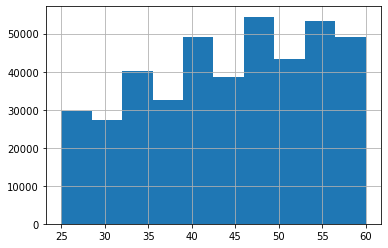

In [ ]:
houshold_raw['tage'].hist()

In [ ]:
houshold_raw[['earn_male', 'earn_female']].describe()

,earn_male,earn_female
count,311053.000000,348261.000000
mean,4118.764648,2260.470215
std,4972.812012,3066.344238
min,-50000.000000,-20588.000000
25%,1198.000000,0.000000
50%,3124.000000,1583.000000
75%,5417.000000,3333.000000
max,96244.000000,93500.000000


# Data Cleaning 

- keep if swave<3
- replace month=12+month if year==2009
- minmonth=min(month), by(ssuid epppnum) ?
- famsize=6 if famsize>6 (keep?)
- pp=group(ssuid epppnum)
    -> bys pp: keep if _N==8
- ??? rebate: replace X=X/1000 ???

## ToDo:

- drop observations with rebate_month not in observations?
- robustness check(?): keep all waves and see if longer timeframes available for sufficiently large N
- topcoding? income<0; familysize; 
- tpearn= tfearn ?
- create dummies for variables to control for in tau 
> start with the variables used in the paper. 'interactions permit the earnings distribution to shift based on':
> - marital status
> - family size 
> - month
> - month relative to the interview month

- **optional**: add assert statements to the functions for error handling

(198574, 49)

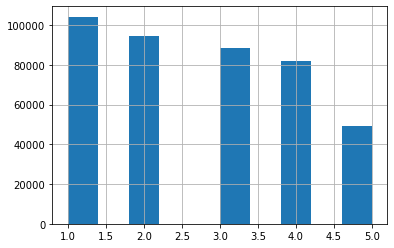

In [267]:
houshold_raw['swave'].hist()
houshold = houshold_raw[houshold_raw.swave <= 2]
houshold.shape

# Create Variables
- pp as index
- pp_count to subset to houshold available for 8 periods 
- month_total
- amt_tot
- everreb
- min_month
- reb_month
- lag_time
- change_spouse

## ToDo

- define mu_i
- dummies for houshold characteristics-groupings
- **check that housholds with multiple individuals are not duplicated**
> - pp is unique identifier from epppnum + ssuid, ssuid is the HH-id
> - to have some individual data, both individuals are in the data set
> - explore observations grouped by ssuid with count(ssuid) > 1


In [268]:
houshold['ssuid'] = houshold['ssuid'].astype(int)

In [269]:
#houshold['epppnum'].unique().shape #11
#houshold['ssuid'].unique().shape #26519

houshold['pp'] = houshold.groupby(['ssuid','epppnum']).ngroup() #26569 unique
pp_count = houshold.groupby(['pp']).size() # need index for merging!

houshold = houshold.merge(pp_count.rename('pp_count'), how = 'outer', left_on = 'pp', right_index = True)
houshold = houshold[houshold['pp_count']== 8]

print(len(houshold['pp'].unique())) #  N = 22998 as in figure 1 (results) Powell(2020) (dropped ~4k)
print(len(houshold['ssuid'].unique()))
houshold.shape # (198574, 51)

22998
22998


(183984, 50)

there are a lot of HHs with more than 8 periods available!


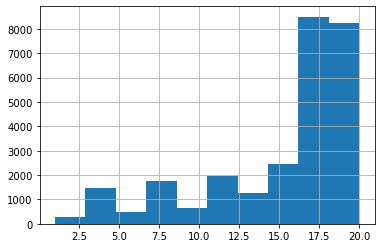

In [270]:
houshold2 = houshold_raw
houshold2['pp'] = houshold_raw.groupby(['ssuid','epppnum']).ngroup() #26569 unique
#houshold2.drop('pp', axis=1, inplace=True)
pp_count = houshold2.groupby(['pp']).size() # need index for merging!
pp_count.hist()
del houshold2
#houshold2 = houshold2.merge(pp_count.rename('pp_count'), how = 'outer', left_on = 'pp', right_index = True)
#houshold2[houshold2['pp_count']< 8].shape
print('there are a lot of HHs with more than 8 periods available!')

In [271]:
houshold.set_index('pp', inplace = True)
houshold.head()

,ssuid,swave,srefmon,month,year,ehrefper,whfnwgt,tfearn,tftotinc,epppnum,...,amt8,reb9,amt9,reb10,amt10,reb11,amt11,reb12,amt12,pp_count
pp,,,,,,,,,,,,,,,,,,,,,
0,19128000276,2,Fourth Reference month,January,2009,101,3973.9954,0,381,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,First Reference month,June,2008,101,3282.6489,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,Second Reference month,July,2008,101,3269.0889,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,Third Reference month,August,2008,101,3262.1228,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0,19128000276,1,Fourth Reference month,September,2008,101,3242.7625,0,1099,0101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [272]:
houshold['amt_tot'] = houshold[['amt4', 'amt5', 'amt6','amt7', 'amt8','amt9', 'amt10', 'amt11', 'amt12']].sum(axis=1)
houshold['amt_tot'].describe()

count    183984.000000
mean        728.870422
std         560.518372
min           0.000000
25%         300.000000
50%         600.000000
75%        1200.000000
max        4500.000000
Name: amt_tot, dtype: float64

In [273]:
#  sum of all rebate dummy columns
houshold['everreb'] = houshold[['reb4', 'reb5', 'reb6', 'reb7','reb8','reb9', 'reb10', 'reb11', 'reb12']].sum(axis=1)
houshold['everreb'].describe()

count    183984.000000
mean          0.816941
std           0.386538
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: everreb, dtype: float64


 If unable to use NaN in lags, also look for which timeframe has the largest obs-count 



<AxesSubplot:>

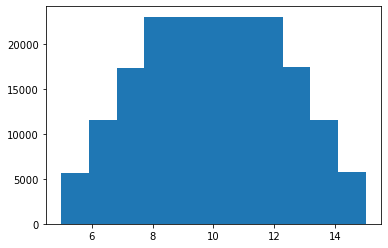

In [274]:
month_number_dict = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12
}

houshold.replace({'month': month_number_dict}, inplace = True)

# lambda function to get total month (Jan 2008 != Jan 2009)
def get_total_month(year,month):
    if year == 2009:
        return month+12
    else:
        return month
        
houshold['month_total'] = houshold.apply(lambda x: get_total_month(x['year'],x['month']),axis=1)

print('\n If unable to use NaN in lags, also look for which timeframe has the largest obs-count \n')

houshold['month_total'].hist(grid=False, bins = len(houshold['month_total'].unique()))

In [275]:
# get month of payout from rebX columns
houshold['reb_month'] = houshold[['reb4', 'reb5', 'reb6', 'reb7','reb8','reb9', 'reb10', 'reb11',
          'reb12']].idxmax(axis=1).str.slice(start = 3)

def correct_reb_month(reb_month,everreb):
    if everreb == 0:
        return np.NaN
    else:
        return reb_month
        
houshold['reb_month'] = houshold.apply(lambda x: correct_reb_month(x['reb_month'],x['everreb']),axis=1)

houshold['reb_month'].unique()

array([nan, '5', '6', '4', '7', '8', '10', '9', '11', '12'], dtype=object)

In [276]:
#houshold[houshold['reb_month']<=7]['reb_month'].hist()
#houshold[houshold['reb_month']>7]['reb_month'].hist()
houshold['reb_month'].unique()

array([nan, '5', '6', '4', '7', '8', '10', '9', '11', '12'], dtype=object)

In [277]:
houshold['reb_month'] = pd.to_numeric(houshold['reb_month'])
houshold['lag_time'] =  houshold['month_total'] - houshold['reb_month']
print(houshold['lag_time'].unique())
houshold['lag_time'].describe()

[nan  8.  1.  2.  3.  4.  5.  6.  7.  0.  9. -1. -2. -4. -3. -5. 10. 11.
 -6. -7.]


count    150304.000000
mean          3.995423
std           2.807277
min          -7.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          11.000000
Name: lag_time, dtype: float64

In [278]:
# generate dummy for change in maritial status
spouse_sum = houshold.groupby(['pp'])['spouse'].sum()
houshold = houshold.merge(houshold.groupby(['pp'])['spouse'].sum(), on = 'pp', how = 'left' )
houshold['spouse'] = houshold['spouse_x']
houshold['spouse_sum'] = houshold['spouse_y']
houshold.drop('spouse_x', axis = 1, inplace = True)
houshold.drop('spouse_y', axis = 1, inplace = True)

#houshold[['spouse', 'spouse_sum']].describe()
#houshold['spouse_sum'].unique()

def get_change_spouse(spouse_sum):
    if spouse_sum == 0 or spouse_sum == 8 :
        return 0
    else:
        return 1
        
houshold['change_spouse'] = houshold.apply(lambda x: get_change_spouse(x['spouse_sum']),axis=1)

houshold[['change_spouse', 'spouse_sum']].describe()

,change_spouse,spouse_sum
count,183984.000000,183984.000000
mean,0.006305,4.617662
std,0.079153,3.943544
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,8.000000
75%,0.000000,8.000000
max,1.000000,8.000000


# Subset df for the analysis 

Dataframe containing only the variables used in the analysis. 
The first subset is the default dataset without any grouping dummies, but all variables as standard control variables.
Each grouping-setup will have its own subset.

## Outcome: 
select row for each HH with lag_time (lag_lead) of interest
- **tf_earn**: model as absolute value or as percentage change?

## Covariates:
- **dummy variables**: spouse, change_spouse, reb_month, srefmon, famsize, change_famsize 
- **continous variables**: tot_rebate, see variables used for heterogeneity estimation
> - per robustness checks included/excluded
>> How are the papers handling this?




#### HH specific Intercept - mu_i
that captures differences in the average level of labor income across households

#### HH types (groups) for Heterogeneity 
- non-labor earnings (= total earnings - labor earnings) as measure for liquidity?
> - multiple ways to calculate and group this variable (amount; ratio of labor/non-labor)
- changes in non_labor earnigns? are assets sold?
- age (tage)
- earn_male larger/smaller earn_female
> - also include lags of this? e.g. income 6 months before

# ToDo:
- get change variable for famsize
- (*change lag_time to leads_lags*)
- use longer timeframe than 8 months? -> expand total_month calculation

# Open Questions:

- **month relative to interview month**: srefmonth-reb_month? see Stata Code
> - amount variables for each type of work e.g.  TMLMSUM (Amount of income from moonlighting or extra jobs in this month)
> - TOTHPROP or EAST4A Rental property owned -> search assets/property


In [ ]:
# write function that returns a df with the row values as columns for each year.

# drop NaN in lag_time column?
# use on df without NaN in lag_time period
def get_pivoted_feature(df, col_name):
    rslt_df = df.pivot(columns = 'lag_time', values = col_name)
    clm_lst = []
    for i in range(len(rslt_df.columns)):
        clm_lst.append(col_name + str(str(rslt_df.columns[i])[0:-2]))
    rslt_df.columns = clm_lst
    return rslt_df

get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'everreb').replace(np.NaN,0) #.describe()


houshold.reset_index(inplace = True)

pivoted_reb = get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'everreb').replace(np.NaN,0)
reb_cols = pivoted_reb.columns
houshold = houshold.merge(pivoted_reb, how ='outer', left_index = True, right_index=True)
houshold.set_index(['pp'], inplace=True)

houshold[houshold['everreb'].notnull()][reb_cols]

In [290]:
houshold.to_csv('/Users/maxweber/Downloads/JOLE share/household.csv')

# Fixed Effects Analysis on Powell Dataset

In [350]:
houshold = pd.read_csv('/Users/maxweber/Downloads/JOLE share/household.csv')
houshold.columns

Index(['pp', 'index', 'Unnamed: 0', 'ssuid', 'swave', 'srefmon', 'month',
       'year', 'ehrefper', 'whfnwgt', 'tfearn', 'tftotinc', 'epppnum', 'tage',
       'tpearn', 'tptotinc', 'rf_new', 'famsize', 'totearn', 'totinc',
       'earn_male', 'earn_female', 'sex_if_single', 'flex', 'moonlit',
       'selfemp', 'totwork', 'totcens', 'type', 'reb_spend', 'reb_save',
       'reb_debt', 'reb4', 'amt4', 'reb5', 'amt5', 'reb6', 'amt6', 'reb7',
       'amt7', 'reb8', 'amt8', 'reb9', 'amt9', 'reb10', 'amt10', 'reb11',
       'amt11', 'reb12', 'amt12', 'pp_count', 'amt_tot', 'everreb',
       'month_total', 'reb_month', 'lag_time', 'spouse', 'spouse_sum',
       'change_spouse', 'everreb-7', 'everreb-6', 'everreb-5', 'everreb-4',
       'everreb-3', 'everreb-2', 'everreb-1', 'everreb0', 'everreb1',
       'everreb2', 'everreb3', 'everreb4', 'everreb5', 'everreb6', 'everreb7',
       'everreb8', 'everreb9', 'everreb10', 'everreb11'],
      dtype='object')

In [283]:
from linearmodels import PanelOLS
import statsmodels.api as sm

In [351]:
houshold.reset_index(inplace = True, drop = False)
houshold.set_index(['ssuid', 'month_total'], inplace=True, drop=False)
houshold[houshold['everreb'].notnull()][reb_cols]

everreb-7  everreb-6  everreb-5  everreb-4  \
ssuid        month_total                                               
19128000276  13                 NaN        NaN        NaN        NaN   
             6                  NaN        NaN        NaN        NaN   
             7                  NaN        NaN        NaN        NaN   
             8                  NaN        NaN        NaN        NaN   
             9                  NaN        NaN        NaN        NaN   
...                             ...        ...        ...        ...   
955958398688 8                  0.0        0.0        0.0        0.0   
             9                  0.0        0.0        0.0        0.0   
             10                 0.0        0.0        0.0        0.0   
             11                 0.0        0.0        0.0        0.0   
             12                 0.0        0.0        0.0        0.0   

                          everreb-3  everreb-2  everreb-1  everreb0  everreb1  \
ssuid        month_total                                                        
19128000276  13                 NaN        NaN        NaN       NaN       NaN   
             6                  NaN        NaN        NaN       NaN       NaN   
             7                  NaN        NaN        NaN       NaN       NaN   
             8                  NaN        NaN        NaN       NaN       NaN   
             9                  NaN        NaN        NaN       NaN       NaN   
...                             ...        ...        ...       ...       ...   
955958398688 8                  0.0        0.0        1.0       0.0       0.0   
             9                  0.0        0.0        0.0       1.0       0.0   
             10                 0.0        0.0        0.0       0.0       1.0   
             11                 0.0        0.0        0.0       0.0       0.0   
             12                 0.0        0.0        0.0       0.0       0.0   

                          everreb2  everreb3  everreb4  everreb5  everreb6  \
ssuid        month_total                                                     
19128000276  13                NaN       NaN       NaN       NaN       NaN   
             6                 NaN       NaN       NaN       NaN       NaN   
             7                 NaN       NaN       NaN       NaN       NaN   
             8                 NaN       NaN       NaN       NaN       NaN   
             9                 NaN       NaN       NaN       NaN       NaN   
...                            ...       ...       ...       ...       ...   
955958398688 8                 0.0       0.0       0.0       0.0       0.0   
             9                 0.0       0.0       0.0       0.0       0.0   
             10                0.0       0.0       0.0       0.0       0.0   
             11                1.0       0.0       0.0       0.0       0.0   
             12                0.0       1.0       0.0       0.0       0.0   

                          everreb7  everreb8  everreb9  everreb10  everreb11  
ssuid        month_total                                                      
19128000276  13                NaN       NaN       NaN        NaN        NaN  
             6                 NaN       NaN       NaN        NaN        NaN  
             7                 NaN       NaN       NaN        NaN        NaN  
             8                 NaN       NaN       NaN        NaN        NaN  
             9                 NaN       NaN       NaN        NaN        NaN  
...                            ...       ...       ...        ...        ...  
955958398688 8                 0.0       0.0       0.0        0.0        0.0  
             9                 0.0       0.0       0.0        0.0        0.0  
             10                0.0       0.0       0.0        0.0        0.0  
             11                0.0       0.0       0.0        0.0        0.0  
             12                0.0       0.0       0.0        0.0       

In [352]:
houshold.loc[19128038046][['everreb-7', 'everreb-6', 'everreb-5', 'everreb-4', 'everreb-3','everreb-2', 'everreb-1', 'everreb0', 'everreb1', 'everreb2',
          'everreb3', 'everreb4', 'everreb5', 'everreb6', 'everreb7', 'everreb8','everreb9', 'everreb10', 'everreb11']]

,everreb-7,everreb-6,everreb-5,everreb-4,everreb-3,everreb-2,everreb-1,everreb0,everreb1,everreb2,everreb3,everreb4,everreb5,everreb6,everreb7,everreb8,everreb9,everreb10,everreb11
month_total,,,,,,,,,,,,,,,,,,,
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [331]:
exog_vars = houshold[['everreb-2', 'everreb-1', 'everreb0', 'everreb1', 'everreb2','everreb3', 'everreb4']].multiply(houshold['amt_tot'], axis = 'index')
exog = sm.add_constant(exog_vars)

model = PanelOLS(houshold['tfearn'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)

model.fit().params

/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/maxweber/opt/anaconda3/lib/python3.8/site-packages/linearmodels/panel/model.py:1184: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


const        5121.902088
everreb-2       0.056597
everreb-1       0.070429
everreb0        0.041484
everreb1        0.020971
everreb2        0.020389
everreb3        0.008273
everreb4        0.028760
Name: parameter, dtype: float64

In [353]:
def get_grouping(df_column, group_dict, reb_dummies_df):
    # get flag indicating the group with the dictionary-mapping:
    new_col = df_column.apply(lambda x: next((k for k, v in group_dict.items() if x in v), 0))
    new_col = new_col.rename(new_col.name + '_flag')
    new_cols = pd.get_dummies(new_col) # get dummies from group flag


   # create interaction dummies (group-dummy * rebatelag_dummy) iterating over each group_id and concatenating in the end:
    df_group_interactions = pd.DataFrame(df_column) # for initialization with correct index
    group_lst = group_dict.keys()
    for group_id in group_lst:
        dummies_group = reb_dummies_df.multiply(new_cols[group_id], axis = 'index')
        
        new_dummy_names = []
        for name in dummies_group.columns:
            new_dummy_names.append(name + '-j' + str(group_id))
        dummies_group.columns = new_dummy_names
        df_group_interactions = df_group_interactions.merge(dummies_group,left_index= True, right_index=True)
        #df_group_dummies.replace(np.NaN, 0, inplace = True)
    return df_group_interactions

In [354]:
houshold.drop(['ssuid','month_total'], inplace=True, axis = 1)
houshold.reset_index(inplace=True)
houshold.columns

Index(['ssuid', 'month_total', 'level_0', 'pp', 'index', 'Unnamed: 0', 'swave',
       'srefmon', 'month', 'year', 'ehrefper', 'whfnwgt', 'tfearn', 'tftotinc',
       'epppnum', 'tage', 'tpearn', 'tptotinc', 'rf_new', 'famsize', 'totearn',
       'totinc', 'earn_male', 'earn_female', 'sex_if_single', 'flex',
       'moonlit', 'selfemp', 'totwork', 'totcens', 'type', 'reb_spend',
       'reb_save', 'reb_debt', 'reb4', 'amt4', 'reb5', 'amt5', 'reb6', 'amt6',
       'reb7', 'amt7', 'reb8', 'amt8', 'reb9', 'amt9', 'reb10', 'amt10',
       'reb11', 'amt11', 'reb12', 'amt12', 'pp_count', 'amt_tot', 'everreb',
       'reb_month', 'lag_time', 'spouse', 'spouse_sum', 'change_spouse',
       'everreb-7', 'everreb-6', 'everreb-5', 'everreb-4', 'everreb-3',
       'everreb-2', 'everreb-1', 'everreb0', 'everreb1', 'everreb2',
       'everreb3', 'everreb4', 'everreb5', 'everreb6', 'everreb7', 'everreb8',
       'everreb9', 'everreb10', 'everreb11'],
      dtype='object')

In [356]:
houshold = houshold.groupby(['ssuid', 'month_total'])[['ssuid', 'tfearn', 'amt_tot','tftotinc', 'month_total', 'reb_month', 'spouse', 'famsize', 
                                                        'everreb0', 'everreb1', 'everreb2', 'everreb3']].agg({'tfearn': 'first',
                                                                                                            'reb_month': 'first',
                                                                                                             'tftotinc': 'first',
                                                                                                             'amt_tot': 'sum',
                                                                                                             'famsize': 'first',
                                                                                                             'spouse': 'first', 
                                                                                                             'everreb0': 'first',
                                                                                                             'everreb1': 'first',
                                                                                                             'everreb2': 'first',
                                                                                                             'everreb3': 'first'})
houshold[['amt_tot', 'tfearn', 'famsize', 'spouse']].describe()

,amt_tot,tfearn,famsize,spouse
count,183984.000000,183984.000000,183984.000000,183984.000000
mean,728.733716,5368.512338,2.826893,0.577208
std,560.627952,5848.215216,1.554868,0.494004
min,0.000000,-46667.000000,1.000000,0.000000
25%,300.000000,1732.000000,2.000000,0.000000
50%,600.000000,4045.000000,3.000000,1.000000
75%,1200.000000,7298.000000,4.000000,1.000000
max,4500.000000,98083.000000,22.000000,1.000000


In [357]:
# analysis on subset with interactions terms:
powell_hh = houshold[['amt_tot', 'tfearn']]
powell_hh['reb'] = houshold['everreb0'] + houshold['everreb1']
powell_hh['reb_lag'] = houshold['everreb3'] + houshold['everreb3']
powell_hh['erbatamt'] = powell_hh['amt_tot'].multiply(powell_hh['reb'], axis = 'index')  # so that it is 0 in the months without rebate payout
powell_hh['erbatamt_lag'] = powell_hh['amt_tot'].multiply(powell_hh['reb_lag'], axis = 'index')
#interaction terms based on  marital status, household size, month (and month relative to interview month)
powell_hh[['spouse', 'famsize']] = houshold[['spouse', 'famsize']]

ems_interactions = powell_hh[['reb', 'reb_lag']].multiply(powell_hh['spouse'], axis='index')
ems_interactions.columns = ['ems_reb', 'ems_reb_lag']

ehhnumpp_dict = {1:range(1,2), 2:range(2,3), 3: range(3,4), 4: range(5,20)} # group 4 has to be omitted to get full rank
hhsize_interactions = get_grouping(powell_hh['famsize'], ehhnumpp_dict, powell_hh[['reb', 'reb_lag']])

powell_hh = pd.concat([powell_hh,ems_interactions,hhsize_interactions], axis = 1)
powell_hh.columns

Index(['amt_tot', 'tfearn', 'reb', 'reb_lag', 'erbatamt', 'erbatamt_lag',
       'spouse', 'famsize', 'ems_reb', 'ems_reb_lag', 'famsize', 'reb-j1',
       'reb_lag-j1', 'reb-j2', 'reb_lag-j2', 'reb-j3', 'reb_lag-j3', 'reb-j4',
       'reb_lag-j4'],
      dtype='object')

In [362]:
exog_vars = powell_hh[['reb', 'reb_lag']]
exog = sm.add_constant(exog_vars)

model_base_reb = PanelOLS(powell_hh['erbatamt'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_base_reb = model_base_reb.fit()
params_base_reb

Dep. Variable:,erbatamt,R-squared:,0.6850
Estimator:,PanelOLS,R-squared (Between):,0.5258
No. Observations:,150304,R-squared (Within):,0.7704
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.7400
Time:,14:36:26,Log-likelihood,-9.822e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.43e+05
Entities:,18788,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(2,131504)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,1.43e+05


In [363]:
# rebate amount with reb and reb lag only 
exog_vars = powell_hh[['reb', 'reb_lag']]
exog = sm.add_constant(exog_vars)

model_base_reb_lag = PanelOLS(powell_hh['erbatamt_lag'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_base_reb_lag = model_base_reb_lag.fit()
params_base_reb_lag

Dep. Variable:,erbatamt_lag,R-squared:,0.7369
Estimator:,PanelOLS,R-squared (Between):,0.0693
No. Observations:,150304,R-squared (Within):,0.7692
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.7452
Time:,14:36:56,Log-likelihood,-1.08e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.842e+05
Entities:,18788,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(2,131504)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,1.842e+05


In [364]:
# first stage fitted rebate with interactions 
exog_vars = powell_hh[['reb', 'reb_lag', 'reb-j1', 'reb_lag-j1', 'reb-j2', 'reb_lag-j2', 'reb-j3', 'reb_lag-j3', 'ems_reb', 'ems_reb_lag']]
exog = sm.add_constant(exog_vars)
exog
model_interactions = PanelOLS(powell_hh['erbatamt'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_interactions = model_interactions.fit()
params_interactions

Dep. Variable:,erbatamt,R-squared:,0.7970
Estimator:,PanelOLS,R-squared (Between):,0.6948
No. Observations:,150304,R-squared (Within):,0.8521
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.8326
Time:,14:37:08,Log-likelihood,-9.491e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,5.163e+04
Entities:,18788,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(10,131496)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,5.163e+04


In [365]:
# first stage fitted rebate lag with interactions 
exog_vars = powell_hh[['reb', 'reb_lag', 'reb-j1', 'reb_lag-j1', 'reb-j2', 'reb_lag-j2', 'reb-j3', 'reb_lag-j3', 'ems_reb', 'ems_reb_lag']]
exog = sm.add_constant(exog_vars)
exog
model_interactions = PanelOLS(powell_hh['erbatamt_lag'], exog, entity_effects = True, time_effects = True, check_rank = True, drop_absorbed=True)
params_interactions = model_interactions.fit()
params_interactions

Dep. Variable:,erbatamt_lag,R-squared:,0.8292
Estimator:,PanelOLS,R-squared (Between):,0.3960
No. Observations:,150304,R-squared (Within):,0.8502
Date:,"Sun, Jun 05 2022",R-squared (Overall):,0.8347
Time:,14:37:24,Log-likelihood,-1.048e+06
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6.386e+04
Entities:,18788,P-value,0.0000
Avg Obs:,8.0000,Distribution:,"F(10,131496)"
Min Obs:,8.0000,,
Max Obs:,8.0000,F-statistic (robust):,6.386e+04


### dataframe with pivoted features / cross sectional layout

In [ ]:
from functools import reduce
output = get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'tfearn')
lagged_reb = get_pivoted_feature(houshold[houshold['lag_time'].notnull()], 'amt_tot')
control_dummies = houshold[['spouse', 'change_spouse', 'srefmon', 'reb_month', 'famsize']].groupby('pp').first()
cont_variables = houshold[['tage']].groupby('pp').first()

variables = [output, lagged_reb, control_dummies, cont_variables]
df_default = reduce(lambda  left,right: \
                    pd.merge(left,right, left_index = True, right_index = True, how='outer'), variables)
df_default.shape

(22998, 44)